# Présentation des données utilisées dans l'article

### Importation des modules customs

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..')) +'\\analyser_tools'
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    
from EmailDataFrame import *

C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\analyser_tools


### Modules python

In [2]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

### Path

In [3]:
cwd = pathlib.PurePath(os.getcwd())
project_root_dir = cwd.parent
theme_path = project_root_dir / "data" / "theme_words.csv"
email_raw_path = project_root_dir / "output" / 'csv_file' / 'email_raw.csv'
facebook_url_info_path = project_root_dir / 'output' / 'csv_file' / 'facebook_urls_info.csv'
youtube_url_info_path = project_root_dir / 'output' / 'csv_file' / 'youtube_urls_info.csv'
log_file_path = project_root_dir / 'output' / 'log_file' / 'url_cleaning.log'
removed_email_path = project_root_dir / 'output' / 'csv_file' / 'removed_email_from_decrypteur.csv'

dataclean_pickle_path = project_root_dir / 'output' / 'pickle_obj' / 'dataClean'
dataclean_all_pickle_path = project_root_dir / 'output' / 'pickle_obj' / 'dataClean_all'
dataclean_pre_pickle_path = project_root_dir / 'output' / 'pickle_obj' / 'dataClean_pre'

corpus_em_path = project_root_dir / 'output' / 'pickle_obj' / 'corpus_em'
corpus_day_path = project_root_dir / 'output' / 'pickle_obj' / 'corpus_day'
dtm_em_path = project_root_dir / 'output' / 'pickle_obj' / 'dtm_em'
dtm_day_path = project_root_dir / 'output' / 'pickle_obj' / 'dtm_day'

output_path_graph_folder = project_root_dir / 'output' / 'graph_png'

### convertisseur de données à l'ouverture de csv pour les list-like objects

In [4]:
fb_yt_converter = {'theme': lambda x: x.strip("[]").replace("'", "").strip().split(', ')}
email_raw_converters = {"attach_type": lambda x: x.strip("[]").replace("'", "").lower().strip().split(", "),
                        "urls": lambda x: x.strip("[]").replace("'", "").strip().split(', ')
                        }

### Lire les données traiteés dans le notebook 2

In [5]:
#Load from pickle si aucune nouvelle modification 

#email
EmailDfBaseClass.read_dict_theme_from_csv(theme_path)
email_raw = EmailDF.from_csv(email_raw_path)
email_df = EmailDF.from_pickle(dataclean_pickle_path)
email_df_pre = EmailDF.from_pickle(dataclean_pre_pickle_path)
email_df_all = EmailDF.from_pickle(dataclean_all_pickle_path)


#URLS
fb_url = UrlDF.from_csv(facebook_url_info_path, parse_dates=None, converters=fb_yt_converter)
yt_url = UrlDF.from_csv(youtube_url_info_path, parse_dates=None, converters=fb_yt_converter)

#LOAD CORPUS AND DTM
corpus_em = EmailCorpus.from_pickle(corpus_em_path)
corpus_day = EmailCorpus.from_pickle(corpus_day_path)
dtm_em = EmailDTM.from_pickle(dtm_em_path)
dtm_day = EmailDTM.from_pickle(dtm_day_path)

loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dataClean
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dataClean_pre
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dataClean_all
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\corpus_em
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\corpus_day
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dtm_em
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dtm_day


## Données Descriptives pour l'introduction de l'article

### nombre courriel depuis 1er mars

In [6]:
n_email = email_df.df.shape[0]
n_email

5230

### Nombre d'urls et nombre de popularité

Nombre d'urls

In [7]:
n_url = email_df.df.urls.explode()[email_df.df.urls.explode().apply(lambda x : x!='')].shape[0]
n_url

5413

Pourcentage de chaque domaine

In [8]:
(email_df.df.domain.explode().value_counts().drop('')/n_url *100)[:20]

youtube              24.662849
facebook             21.466839
radio-canada          3.343802
google                1.459449
twitter               1.404027
ytimg                 0.831332
wordpress             0.757436
medium                0.572695
instagram             0.572695
blogspot              0.554221
redd                  0.554221
linkedin              0.517273
lapresse              0.498799
journaldemontreal     0.480325
over-blog             0.461851
tvanouvelles          0.424903
covidinfos            0.406429
lemonde               0.351007
wikipedia             0.351007
msn                   0.332533
Name: domain, dtype: float64

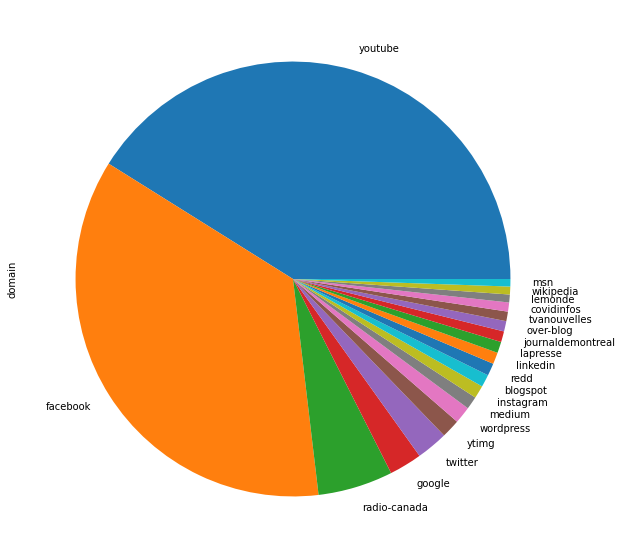

In [9]:
(email_df.df.domain.explode().value_counts().drop('')/n_url *100)[:20].plot(kind='pie', figsize=(10,10))
plt.savefig(output_path_graph_folder/'domain_pie.png', dpi=300)

## nombre de views par domaine

### facebook top 25

In [10]:
fb_url.df.sort_values('views', ascending=False)[:25]

,Unnamed: 0,url,title,published_date,comments,reactions,shares,views,theme
405,405,https://www.facebook.com/273957870461345/,Candace Owens - Confession: I DO NOT support G...,2020-06-03T13:02:33-07:00,674124.0,834441.0,NaN,94512205.0,[]
5,5,https://www.facebook.com/221750599238300/,Radio-Québec - #COVID19: La FRAUDE STATISTIQUE...,2020-04-10T14:01:01-07:00,2474.0,2603.0,NaN,452201.0,"[complot, reseaux_sociaux, regions]"
21,21,https://www.facebook.com/904440236674180/,Radio-Québec - #STOPCONFINEMENT | Facebook,2020-04-15T14:02:06-07:00,2183.0,2254.0,NaN,268825.0,"[reseaux_sociaux, regions]"
110,110,https://www.facebook.com/567548763956869/,Radio-Québec - La grippe de 2020 | Facebook,2020-06-23T14:08:50-07:00,2879.0,2392.0,NaN,164880.0,"[virus, reseaux_sociaux, regions]"
850,850,https://www.facebook.com/2612548505732959/,Dr. Rashid A. Buttar - Live Stream With Dr. Ra...,2020-04-15T16:10:30-07:00,3311.0,2093.0,NaN,157031.0,[reseaux_sociaux]
710,710,https://www.facebook.com/893899171048179/,🚨🚨🚨🚨🚨🚨FLASH INFO CORONAVIRUS 🚨🚨🚨🚨🚨🚨🚨 - Frank B...,2020-03-25T09:41:47-07:00,958.0,1868.0,NaN,109723.0,"[virus, politique]"
8,8,https://www.facebook.com/10163425830315501/,Claude Gélinas - Claude Gélinas was live.,2020-05-15T09:42:06-07:00,556.0,793.0,NaN,59196.0,[]
131,131,https://www.facebook.com/10207793456470477/,Josée Turmel - La suite...j'ai manqué de batte...,2020-05-28T16:26:18-07:00,325.0,496.0,NaN,35122.0,[]
48,48,https://www.facebook.com/10163730984880501/,Claude Gélinas - Claude Gélinas was live.,2020-07-12T21:47:32-07:00,888.0,429.0,NaN,21388.0,[]
726,726,https://www.facebook.com/10164022041430434/,Val-David se lève! - William James Rochford,2020-06-07T11:22:47-07:00,96.0,104.0,NaN,10120.0,[]


### Top 25 facebook selon le nombre de commentaires

In [11]:
fb_url.df.sort_values('comments', ascending=False)[:25]

,Unnamed: 0,url,title,published_date,comments,reactions,shares,views,theme
405,405,https://www.facebook.com/273957870461345/,Candace Owens - Confession: I DO NOT support G...,2020-06-03T13:02:33-07:00,674124.0,834441.0,NaN,94512205.0,[]
305,305,https://www.facebook.com/1523511527824585/,An0maly - Can Viruses Be Man-Made? | Facebook,2020-03-18T11:18:44-07:00,35409.0,193697.0,361025.0,NaN,[reseaux_sociaux]
503,503,https://www.facebook.com/511772752936235/,France 2 - Chine : des citoyens notés en fonct...,2019-10-10T08:33:02-07:00,34211.0,75869.0,157927.0,NaN,"[reseaux_sociaux, europe, chine]"
172,172,https://www.facebook.com/2671555386492296/,Occupy Democrats - 🔥Republican SHREDS Trump: T...,NaN,33528.0,139786.0,221713.0,NaN,"[reseaux_sociaux, usa]"
389,389,https://www.facebook.com/227648325147160/,Chris Cuomo - You have to fight back. I’m not ...,2020-04-06T20:14:50-07:00,29304.0,101947.0,75178.0,NaN,[]
387,387,https://www.facebook.com/3016120575119541/,NowThis - Chris Cuomo Reveals Wife Cristina Te...,2020-04-16T13:00:42-07:00,21037.0,134253.0,44372.0,NaN,"[virus, reseaux_sociaux]"
214,214,https://www.facebook.com/565061731036691/,Anna Ita - Afghanistan: un enfant de 9 ans don...,2020-06-17T04:01:07-07:00,19997.0,26257.0,108501.0,NaN,[]
567,567,https://www.facebook.com/3355329144495502/,"Loopsider - Dans cette région de l'Equateur, d...",2020-04-08T04:56:59-07:00,14013.0,69610.0,156501.0,NaN,[reseaux_sociaux]
426,426,https://www.facebook.com/3446793915347916/,NaN,2020-04-05T23:01:28-07:00,10930.0,19217.0,62366.0,NaN,[]
419,419,https://www.facebook.com/319028135734588/,Nas Daily - The 10 Minute COVID-19 Test. | Fac...,2020-04-09T00:01:50-07:00,10765.0,239049.0,167861.0,NaN,"[virus, bilan, reseaux_sociaux]"


### Top 25 des urls facebook les plus partagés dans les courriels

In [12]:
top_fb_urls_in_email = email_df.df.urls.explode()[email_df.df.domain.explode() == 'facebook'].value_counts()[:25]
top_fb_urls_in_email

https://www.facebook.com/2435648836745547/      13
https://www.facebook.com/10220634658009043/     12
https://www.facebook.com/10157174841211106/     10
https://www.facebook.com/groups/decrypteurs/     8
https://www.facebook.com/221750599238300/        7
https://www.facebook.com/10157174739631106/      7
https://www.facebook.com/4696237033735338/       6
https://www.facebook.com/10163425830315501/      6
https://www.facebook.com/1170890569958096/       6
https://www.facebook.com/3046035462289522/       5
http://www.facebook.com                          5
https://www.facebook.com/3148558748511356/       5
https://www.facebook.com/226913052006274/        5
https://www.facebook.com/110766340380387/        5
https://www.facebook.com/3004250292972420/       5
https://www.facebook.com/1952307158131536/       5
https://www.facebook.com/669008923670898/        5
http://www.facebook.com/MPbymarietteparent       4
https://www.facebook.com/2632293457028977/       4
https://www.facebook.com/7jours

### le nombre de vues de ces videos

In [13]:
data_fb_top_25 = fb_url.df[fb_url.df.url.apply(lambda u : u in top_fb_urls_in_email.index.values)]
data_fb_top_25

,Unnamed: 0,url,title,published_date,comments,reactions,shares,views,theme
0,0,https://www.facebook.com/2435648836745547/,7 jours sur Terre - L'OMS: une organisation cr...,2020-04-14T20:48:18-07:00,838.0,5297.0,9358.0,NaN,"[reseaux_sociaux, politique]"
1,1,https://www.facebook.com/10220634658009043/,Écouter ça avant de vous faire tester ou... - ...,2020-07-20T04:23:32-07:00,1104.0,1535.0,12845.0,NaN,[]
2,2,https://www.facebook.com/10157174841211106/,Facebook,NaN,NaN,NaN,NaN,NaN,[reseaux_sociaux]
3,3,https://www.facebook.com/groups/decrypteurs/,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,4,https://www.facebook.com/10157174739631106/,Facebook,NaN,NaN,NaN,NaN,NaN,[reseaux_sociaux]
5,5,https://www.facebook.com/221750599238300/,Radio-Québec - #COVID19: La FRAUDE STATISTIQUE...,2020-04-10T14:01:01-07:00,2474.0,2603.0,NaN,452201.0,"[complot, reseaux_sociaux, regions]"
6,6,https://www.facebook.com/1170890569958096/,Studio Théovox - Masque &amp; Covid / La persp...,NaN,69.0,1080.0,81.0,NaN,"[virus, masque, reseaux_sociaux]"
7,7,https://www.facebook.com/4696237033735338/,Studio Théovox - Masque &amp; Covid / La persp...,2020-07-08T13:54:31-07:00,3227.0,6279.0,26969.0,NaN,"[virus, masque, reseaux_sociaux]"
8,8,https://www.facebook.com/10163425830315501/,Claude Gélinas - Claude Gélinas was live.,2020-05-15T09:42:06-07:00,556.0,793.0,NaN,59196.0,[]
9,9,https://www.facebook.com/3004250292972420/,CODE 243 - CORONAVIRUS : LA CHINE A MIS LE MON...,NaN,5.0,46.0,6.0,NaN,"[virus, reseaux_sociaux, chine, reste_du_monde]"


### Commentaires, réaction et partages

In [14]:
data_fb_top_25[['comments', 'reactions', 'shares', 'views']].sum()

comments       9947.0
reactions     24995.0
shares        69172.0
views        511397.0
dtype: float64

## youtube

In [15]:
yt_url.df.sort_values('views', ascending=False)[:25]

,Unnamed: 0,url,title,date_published,description,author,rating,views,theme
180,180,https://www.youtube.com/watch?v=6Af6b_wyiwI,The next outbreak? We’re not ready | Bill Gates,2015-04-03,Visit http://TED.com to get our entire library...,TED,4.797184,30834200.0,"[traitement, reseaux_sociaux, reste_du_monde]"
314,314,https://www.youtube.com/watch?v=sjDuwc9KBps,PSA Grocery Shopping Tips in COVID-19 (See Imp...,2020-03-24,www.DrJeffVW.com UPDATE: C.D.C. Recommends Ame...,Jeffrey VanWingen,4.888153,26193008.0,"[virus, reseaux_sociaux]"
217,217,https://www.youtube.com/watch?v=TPpoJGYlW54,How wildlife trade is linked to coronavirus,2020-03-06,And why the disease first appeared in China. N...,Vox,4.786882,22572244.0,"[virus, experts, reseaux_sociaux, chine, reste..."
305,305,https://www.youtube.com/watch?v=DPDPzbLFeP4,A SPOONFUL OF CLOROX - A Randy Rainbow Song Pa...,2020-04-25,THE RANDY RAINBOW SHOW Executive Producer: RAN...,Randy Rainbow,4.873744,6659821.0,[reseaux_sociaux]
416,416,https://www.youtube.com/watch?v=gvuulZPbfBg,Michelle Obama a Man?,2014-03-19,Thumps up and thumbs down are hilarious... Bar...,MrPurpleTie,3.078191,6093400.0,[reseaux_sociaux]
159,159,https://www.youtube.com/watch?v=HhNo_IOPOtU,How to Significantly Slow Coronavirus? #Masks4...,2020-03-27,EDIT: Big news! WHO is changing its position a...,Petr Ludwig / Konec prokrastinace [CZE],4.872178,5729871.0,"[virus, experts, reseaux_sociaux, politique, r..."
98,98,https://www.youtube.com/watch?v=xf-qv9o8nq8,Top Doctor EXPOSES EVERYTHING The Deep State I...,2020-03-30,"Dr. Shiva Ayadurai, the inventor of email and ...",FREE PLEASURES WORLDWIDE,4.754442,5661883.0,"[virus, traitement, reseaux_sociaux, 5g, chine]"
202,202,https://www.youtube.com/watch?v=sPrbGU0Wyh4,Tucker: Big Tech censors dissent over coronavi...,2020-04-28,Big technology companies are using the COVID-1...,Fox News,4.857140,4702415.0,"[virus, reseaux_sociaux, usa]"
13,13,https://www.youtube.com/watch?v=3bXWGxhd7ic,"The first documentary movie on CCP virus, Trac...",2020-04-07,As the world is gripped by the ongoing pandemi...,NTD,4.731617,4423364.0,"[virus, experts, reseaux_sociaux, politique, c..."
361,361,https://www.youtube.com/watch?v=rQRvDBgwb20,Gravitas: Wuhan CoronaVirus | Pictures that Ch...,2020-03-30,Gravitas: Wuhan CoronaVirus | Pictures that Ch...,WION,4.767193,4422827.0,"[virus, reseaux_sociaux, chine, reste_du_monde]"


### Leurs thèmes

In [16]:
yt_url.df.sort_values('views', ascending=False)[:25].theme.explode().value_counts().drop('')

reseaux_sociaux    22
virus              18
reste_du_monde     14
chine              11
experts             6
politique           6
laboratoire         4
traitement          3
5g                  2
usa                 1
europe              1
bilan               1
Name: theme, dtype: int64

### top 25 des urls youtube les plus mentionnées dans les courriels

In [17]:
top_yt_urls_in_email = top_fb_urls_in_email = email_df.df.urls.explode()[email_df.df.domain.explode() == 'youtube'].value_counts()[:25]
top_yt_urls_in_email

https://www.youtube.com/watch?v=7t82PZcp-4A    110
https://www.youtube.com/watch?v=DH7Ot3DrmX4     44
https://www.youtube.com/watch?v=izzadeWl3b0     34
https://www.youtube.com/watch?v=l941UaL913c     33
https://www.youtube.com/watch?v=aqIZbyZJRZE     31
https://www.youtube.com/watch?v=giyZvits7DU     28
https://www.youtube.com/watch?v=PL-49LSFKhw     25
https://www.youtube.com/watch?v=VjlDLSemGd0     19
https://www.youtube.com/watch?v=SEMWLibvGDc     14
https://www.youtube.com/watch?v=AEYHofyP3x4     14
https://www.youtube.com/watch?v=WW3jEzUc-CQ     13
https://www.youtube.com/watch?v=c77Wgp1mQew     12
https://www.youtube.com/watch?v=u33VXrcrd4Y     11
https://www.youtube.com/watch?v=3bXWGxhd7ic     11
https://www.youtube.com/watch?v=Fvp6uah-2hY     10
https://www.youtube.com/watch?v=Z5kA6iBpYR4     10
https://www.youtube.com/watch?v=4eCQUoOUKhE      9
https://www.youtube.com/watch?v=I4Nqqmrg9RY      9
https://www.youtube.com/watch?v=m8HF4GXjsP8      9
https://www.youtube.com/watch?v

### leurs données

In [18]:
data_yt_top_25 = yt_url.df[yt_url.df.url.apply(lambda u : u in top_yt_urls_in_email.index.values)]
data_yt_top_25

,Unnamed: 0,url,title,date_published,description,author,rating,views,theme
0,0,https://www.youtube.com/watch?v=7t82PZcp-4A,"Coronavirus, dangers immédiats et futurs",2020-03-23,ABONNE-TOI! https://www.instagram.com/4ovet24/...,4ovet24,4.495566,2059999.0,"[virus, reseaux_sociaux]"
1,1,https://www.youtube.com/watch?v=DH7Ot3DrmX4,#COVID19: La FRAUDE STATISTIQUE confirmée.,2020-04-10,Les représentants des services sanitaires conf...,Radio-Québec,4.696071,540998.0,"[virus, bilan]"
2,2,https://www.youtube.com/watch?v=izzadeWl3b0,Coronavirus: les chiffres sont faux,2020-03-28,Les chiffres qu'on nous présente sont faux. C'...,EVRARD,4.346366,908312.0,"[virus, complot, experts, reseaux_sociaux, reg..."
3,3,https://www.youtube.com/watch?v=l941UaL913c,Le professeur Luc Montagner prix Nobel de méde...,2020-04-17,"La mascarade est finie, depuis des semaines be...",YellowFlagsInfos News,4.715295,325575.0,"[complot, reseaux_sociaux, politique, chine, r..."
4,4,https://www.youtube.com/watch?v=aqIZbyZJRZE,NaN,NaN,NaN,NaN,NaN,NaN,[]
5,5,https://www.youtube.com/watch?v=giyZvits7DU,NaN,NaN,NaN,NaN,NaN,NaN,[]
6,6,https://www.youtube.com/watch?v=PL-49LSFKhw,NaN,NaN,NaN,NaN,NaN,NaN,[]
7,7,https://www.youtube.com/watch?v=VjlDLSemGd0,Coronavirus: libérez vous du mensonge,2020-03-24,On nous ment sur la réalité de la situation. L...,EVRARD,4.267060,230197.0,"[virus, traitement, bilan, experts, reseaux_so..."
8,8,https://www.youtube.com/watch?v=SEMWLibvGDc,A regarder d’urgence avant la censure : Instit...,2020-08-20,A regarder et à sauvegarder d’urgence. Toutes ...,AGORA TVNEWS,4.531049,1748151.0,[]
9,9,https://www.youtube.com/watch?v=AEYHofyP3x4,Chloroquine: Le complexe médiatico-médical imp...,2020-03-25,Trump a réussi à déjouer les plan de l'État pr...,Radio-Québec,4.880557,201430.0,"[virus, traitement, politique, usa, qanon]"


### Près de la moitié (n=10) des videos les plus partagés (top 25) sont maintenant supprimé de youtube.

In [19]:
data_yt_top_25.title.isnull().sum()

10

### Le top 25 des videos les plus partagés dans les courriels cumulents 10,534,646 de vues sans compter ceux qui sont supprimés...


In [20]:
data_yt_top_25['views'].sum()

12334507.0

In [21]:
data_yt_top_25.theme.explode().value_counts().drop('')

virus              12
reseaux_sociaux     7
politique           6
experts             6
bilan               5
reste_du_monde      5
complot             3
chine               3
usa                 2
europe              2
regions             2
traitement          2
masque              1
qanon               1
Name: theme, dtype: int64

## Conclusion

- Les videos youtube peuvent rejoindre beaucoup de personnes (10M) avec des video datant du mois de mars et avril seulement
- Plusieurs urls youtube populaire dans les courriels sont supprimés (11 du top 25)
- Les posts facebook ont succité beaucoup d'interactions (11 278 commentaires, 25 105 réactions, 64 394 partages et 779 479 vues)


## Combien de courriels taggé

In [22]:
n_theme = len(email_df.theme.keys()) #nombre de theme
n_email = email_df.df.shape[0]

In [23]:
email_df.df.theme.apply(lambda x: len(x) > 0).sum()/n_email *100

89.54110898661568

In [24]:
email_df.df.theme.apply(lambda x: len(x) == 0).sum()/n_email *100

10.45889101338432

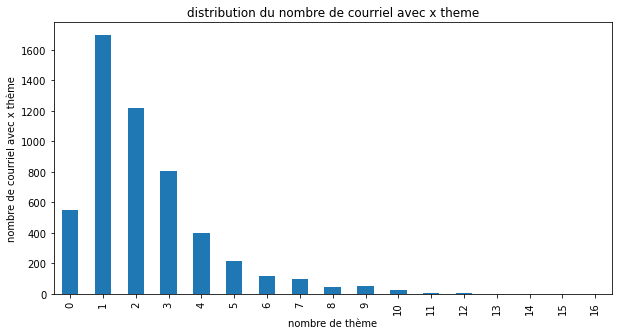

In [25]:

data = {i:email_df.df.theme.apply(lambda x: len(x) == i).sum() for i in range(0,n_theme)}
s = pd.Series(data)
ax = s.plot(figsize=(10,5), kind='bar', title='distribution du nombre de courriel avec x theme')
ax.set_xlabel('nombre de thème')
ax.set_ylabel('nombre de courriel avec x thème')
plt.savefig(output_path_graph_folder/'dist_email_tag_count.png', dpi=300)
plt.show()


## Analayse des données pré-post 1er mars

### voir tendance des thèmes en incluant les données avant le 1er mars.

In [26]:
def plot_theme_per_day(theme_per_day, theme, n_col=5, save=False):
    import matplotlib.pyplot as plt
    import numpy as np
    import math

    n_row = math.ceil(len(theme.keys()) / 5)  # nomber of row to show all plot with n_col
    fig, axs = plt.subplots(n_row, 5, figsize=(30, 15), facecolor='w', edgecolor='k', sharey=True)
    fig.subplots_adjust(hspace=1, wspace=.001)

    axs = axs.ravel()

    for i, theme in enumerate(theme.keys()):
        s = theme_per_day[theme]  # word and count value
        days = s.index
        values = s.values

        axs[i].plot(days, values)
        axs[i].set_title(theme)

        for tick in axs[i].get_xticklabels():
            tick.set_rotation(90)

    if save:
        plt.savefig('theme_per_day.png', dpi=300)

### TOUTES LES DATES

In [27]:
def plot_theme_per_day(theme_per_day, theme, n_col=5, save=False):
    import matplotlib.pyplot as plt
    import numpy as np
    import math

    n_row = math.ceil(len(theme.keys()) / 5)  # nomber of row to show all plot with n_col
    fig, axs = plt.subplots(n_row, 5, figsize=(15, 10), facecolor='w', edgecolor='k', sharey=True)
    fig.subplots_adjust(hspace=1, wspace=.001)

    axs = axs.ravel()

    for i, theme in enumerate(theme.keys()):
        s = theme_per_day[theme]  # word and count value
        days = s.index
        values = s.values

        axs[i].plot(days, values)
        axs[i].set_title(theme)

        for tick in axs[i].get_xticklabels():
            tick.set_rotation(90)

    if save:
        plt.savefig('theme_per_day.png', dpi=300)

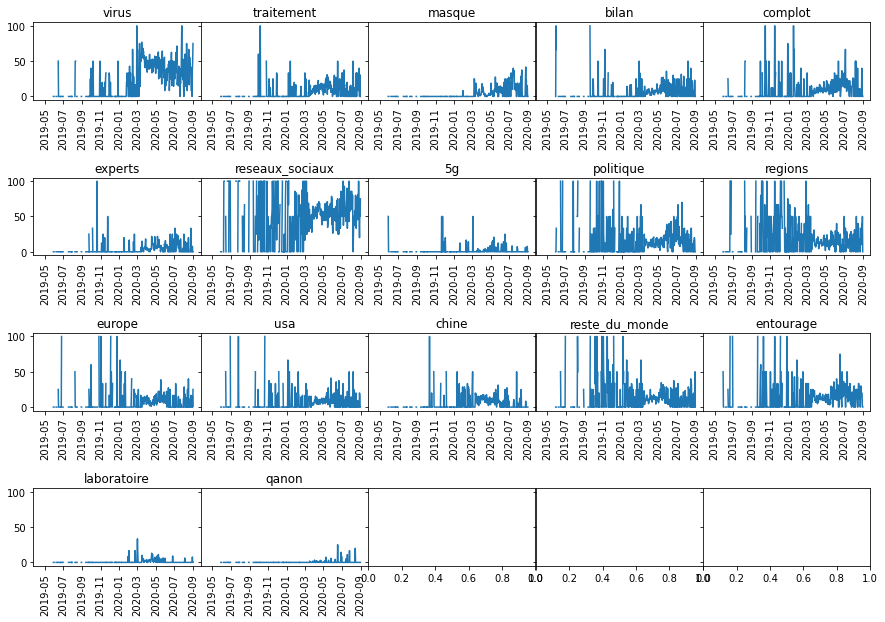

In [28]:
plot_theme_per_day(email_df_all.theme_per_day(), email_df.theme)

### La tendance de réseaux sociaux est à la hausse en réalité, pas constante. Celle de virus est plutôt à la baisse, bien que très élevé.

In [29]:
# theme = 'chine'
# fig, axes = plt.subplots(3,1, sharex=True, figsize=(20,10))
# email_df.email_per_day.plot(ax =axes[0], label='Tout')
# email_df.theme_per_day(pourc=False)[theme].plot(label=theme, ax =axes[1])
# email_df.theme_per_day()[theme].plot(label=theme, ax =axes[2])
# for ax in axes:
#     ax.legend(loc='best')

# for ax in axes[:2]:
#     ax.set_ylim([0,135])
# axes[2].set_ylim([0,100])

# axes[0].set_ylabel('nombre de courriel par jour')
# axes[1].set_ylabel('nombre de courriel par jour')
# axes[2].set_ylabel('pourcentage de courriel par jour')
# axes[2].set_xlabel('Date')
# fig.suptitle(f"Représentation du nombre de courriel par jour avec le thème {theme}", fontsize=16)
# plt.show()
# plt.savefig(output_path_graph_folder/f'{theme}.png', dpi=300)


### Conclusion

- Virus a eu une augmentation fulgurante à partir du 1er mars et la tendance est à la baisse.
- Réseaux sociaux es toujours aussi important.
- Complot semble être en augmentation en pourcentage de courriel, tout comme entourgage bien que ce dernier soit moins marqué.



## ORIGINE DU VIRUS

### Combien de courriel mentionnait virus entre mars et avril ou mars et mai

In [30]:
c_v = email_df.filt_by_date((2020,3,31),(2020,4,30)).filt('theme', with_values=['chine', 'virus'], condition ='and').df.shape[0]
c_l =  email_df.filt_by_date((2020,3,31),(2020,4,30)).filt('theme', with_values=['chine', 'laboratoire'], condition ='and').df.shape[0]
c_v_l = email_df.filt_by_date((2020,3,31),(2020,4,30)).filt('theme', with_values=['chine', 'laboratoire', 'virus'], condition ='and').df.shape[0]

print('chine et virus', c_v)
print('chine et laboratoire', c_l)
print('chine et virus et laboratoire', c_v_l)

chine et virus 191
chine et laboratoire 48
chine et virus et laboratoire 44


### quand retrouve-t-on ces courriels

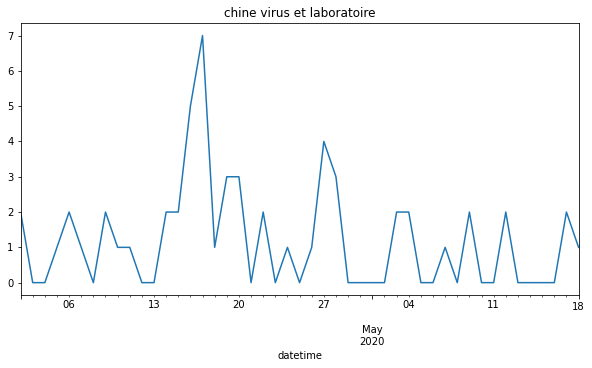

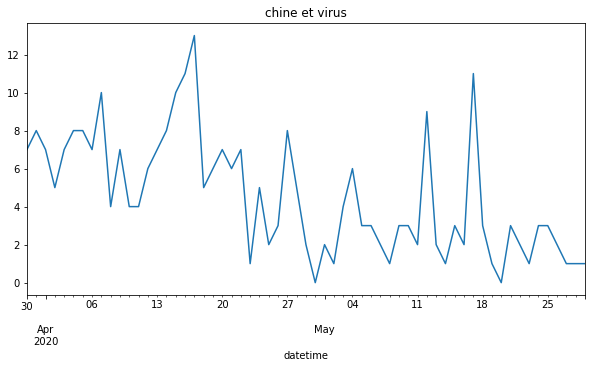

In [31]:
email_df.filt_by_date((2020,3,30),(2020,5,30)).filt('theme', with_values=['chine', 'virus', 'laboratoire'], condition ='and').df.set_index('datetime').resample('D').count().email_id.plot(figsize=(10,5), title = 'chine virus et laboratoire')
plt.show()
email_df.filt_by_date((2020,3,30),(2020,5,30)).filt('theme', with_values=['chine', 'virus'], condition ='and').df.set_index('datetime').resample('D').count().email_id.plot(figsize=(10,5), title='chine et virus')
plt.show()

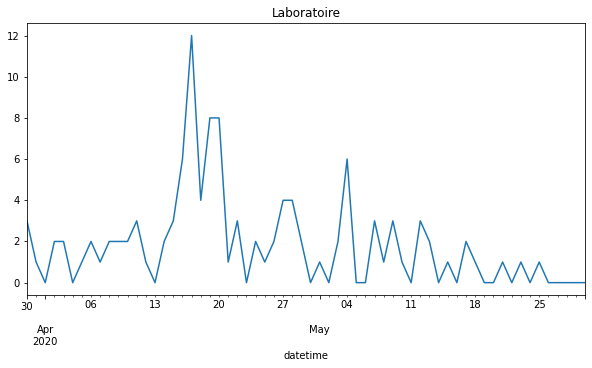

In [32]:
email_df.theme_per_day(pourc=False)['laboratoire'].loc['2020-3-30':'2020-5-30'].plot(figsize=(10,5), title = 'Laboratoire')

### Moments de la mention de la video avec luc montagner

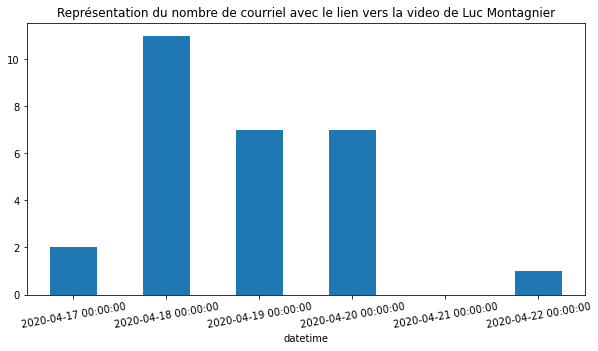

In [33]:
email_df.filt('urls', with_values=['https://www.youtube.com/watch?v=l941UaL913c']).df.set_index('datetime').resample('D').count().email_id.plot(kind='bar', figsize=(10,5), title = 'Représentation du nombre de courriel avec le lien vers la video de Luc Montagnier')
plt.xlabel = 'Date'
plt.xticks(rotation=10)
plt.ylabel = 'Nombre de courriels'

plt.savefig(output_path_graph_folder/'Luc_Mont.png', dpi = 300)

### conclusion

- à la mi-avril (13-20 avril) y a eu des questionnement sur l'origine du virus de façon plus importante.
- ça concorde bien avec la sortie du vidéo de luc montagner le 17 avril qui a eu 320k de vues et mentionné 28 fois dans les courriels aux dates suivantes

- ET avec google trend pour les mots Luc Montagner  : https://trends.google.com/trends/explore?geo=CA&q=Luc%20Montagner


Entre le 31 mars et le 30 avril
- 191 courriels avaient les thèmes chine ET virus
- 48 courriels avaient les thème chine et laboratoire
- 44 courriels avaient chine, virus ET laboratoire


## Thème en croissance? Est-ce que complot et entourage sont corrélés?

In [34]:
complot = email_df.theme_per_day()['complot']
entourage = email_df.theme_per_day()['entourage']
idx = np.arange(0,len(complot),1)

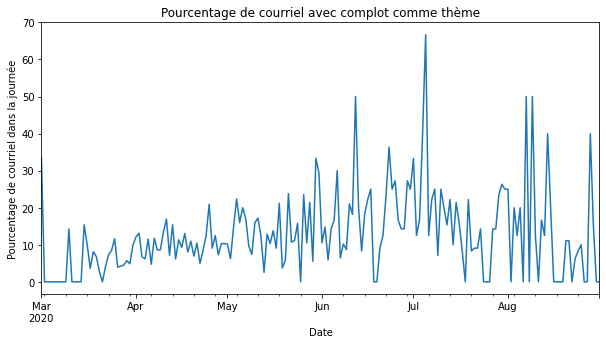

In [35]:
ax = complot.plot(label='complot', title = 'Pourcentage de courriel avec complot comme thème', figsize=(10,5))
ax.set_ylabel("Pourcentage de courriel dans la journée")
ax.set_xlabel("Date")
plt.savefig(output_path_graph_folder / 'complot_seul.png', dpi = 300)

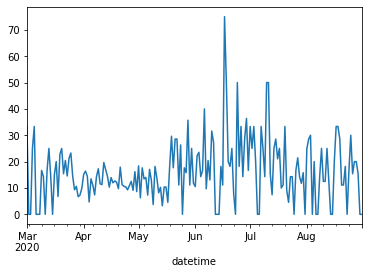

In [36]:
entourage.plot()

In [37]:
complot = email_df.theme_per_day()['complot']
entourage = email_df.theme_per_day()['entourage']
idx = np.arange(0,len(complot),1)

Pour faire un test de pearson R, on doit s'assuré que la distribution est normale pour les deux variables d'intérêts

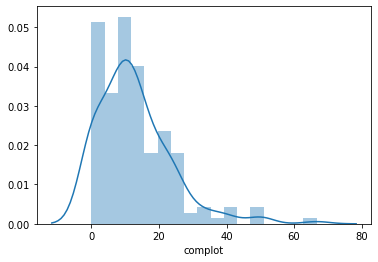

In [38]:
sns.distplot(complot)
plt.show()

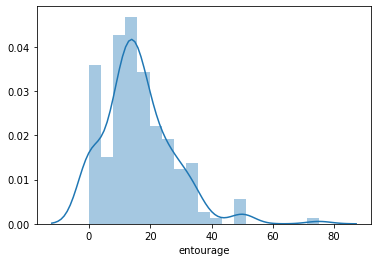

In [39]:
sns.distplot(entourage)
plt.show()

Les deux variable semblent normalement distribués dans le temps, regardons la valeur de corrélation

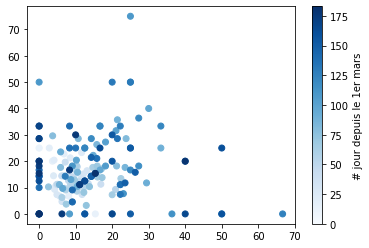

In [40]:
plt.scatter(complot.values, entourage.values, c=idx, cmap=plt.cm.Blues)
cb = plt.colorbar(label = '# jour depuis le 1er mars')


In [41]:
np.corrcoef(complot.values, entourage.values)

array([[1.        , 0.11787941],
       [0.11787941, 1.        ]])

La corrélation est faible (peason r = 0.14), par contre les deux themes ont une tendance à la hausse en pourcentage de courriel

On voit en effet une légère inflection, tendance vers l'exponnetielle qui témoigne de l'augmentation du thème complot depuis mars.

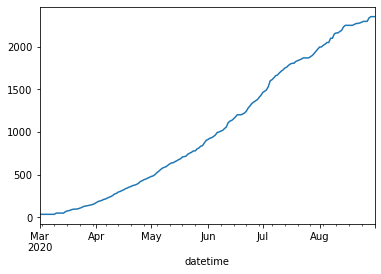

In [42]:
complot.cumsum().plot()
plt.show()

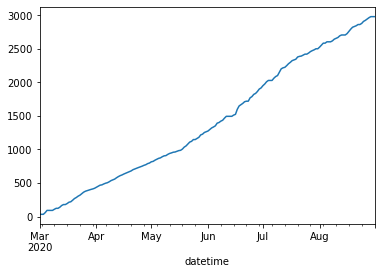

In [43]:
entourage.cumsum().plot()

### Conclusion

- Complot et entourage sont faiblement corrélé de mars à août.
- Complot a une tendance plus forte à la hausse qu'entourage.

## Complot Bilan 

In [44]:
complot =  email_df.filt('theme', with_values=['complot'], condition ='and').df
bilan =  email_df.filt('theme', with_values=['bilan'], condition ='and').df
c_b = email_df.filt('theme', with_values=['complot', 'bilan'], condition ='and').df.shape[0]
c_b_v = email_df.filt('theme', with_values=['complot', 'bilan', 'virus'], condition ='and').df.shape[0]

print('complot', complot.shape[0])
print('bilan', bilan.shape[0])
print('complot et bilan', c_b)
print('complot et bilan et virus', c_b_v)

complot 566
bilan 419
complot et bilan 67
complot et bilan et virus 57


### complot apparaît quand?

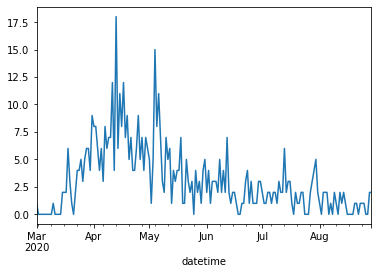

In [45]:
complot.set_index('datetime').resample('D').count().email_id.plot()

In [46]:
### bilan apparaît quand?

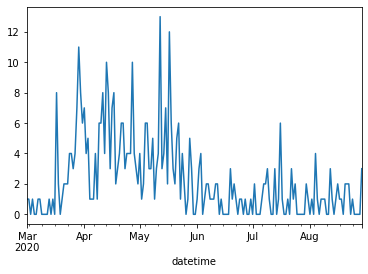

In [47]:
bilan.set_index('datetime').resample('D').count().email_id.plot()

### bilan et complot apparaissent quand ?

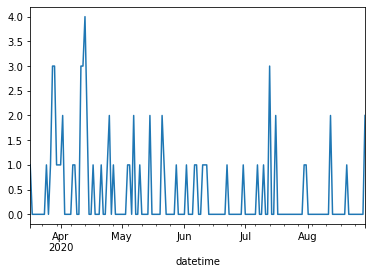

In [48]:
email_df.filt('theme', with_values=['complot', 'bilan'], condition ='and').df.set_index('datetime').resample('D').count().email_id.plot()

### combien de vues ont cumulé les vidéos parlant de bilan?

In [49]:
vid_bilan = email_df.filt('theme', with_values=['bilan'], condition ='and').df.urls.explode().value_counts().drop('')[:10].index.values

In [50]:
yt_bilan = yt_url.df[yt_url.df.url.apply(lambda u : u in vid_bilan)]
fb_bilan = fb_url.df[fb_url.df.url.apply(lambda u : u in vid_bilan)]

In [51]:
yt_bilan

,Unnamed: 0,url,title,date_published,description,author,rating,views,theme
1,1,https://www.youtube.com/watch?v=DH7Ot3DrmX4,#COVID19: La FRAUDE STATISTIQUE confirmée.,2020-04-10,Les représentants des services sanitaires conf...,Radio-Québec,4.696071,540998.0,"[virus, bilan]"
2,2,https://www.youtube.com/watch?v=izzadeWl3b0,Coronavirus: les chiffres sont faux,2020-03-28,Les chiffres qu'on nous présente sont faux. C'...,EVRARD,4.346366,908312.0,"[virus, complot, experts, reseaux_sociaux, reg..."
5,5,https://www.youtube.com/watch?v=giyZvits7DU,NaN,NaN,NaN,NaN,NaN,NaN,[]
19,19,https://www.youtube.com/watch?v=m8HF4GXjsP8,Victoire! la volte-face du gouvernement.,2020-04-24,Le Gouv. Legault CONFIRME l'analyse de radio-Q...,Radio-Québec,4.805863,243198.0,"[virus, bilan, complot, politique, regions]"
31,31,https://www.youtube.com/watch?v=rYkAMmEWxgc,parents vos enfants sont en danger de mort !,2020-04-01,NEWSLETTER GRATUITE: https://www.santeglobale....,Tal Schaller,4.782861,200893.0,"[virus, reseaux_sociaux, reste_du_monde]"
54,54,https://www.youtube.com/watch?v=TCujLL1aeKU,"Même sans pandémie, il y a 1000 décès par mois...",2020-04-29,Cet extrait aide à comprendre que dans les CHS...,Jean-Paul Labelle,4.287671,42827.0,"[virus, bilan]"


In [52]:
fb_bilan

,Unnamed: 0,url,title,published_date,comments,reactions,shares,views,theme
1,1,https://www.facebook.com/10220634658009043/,Écouter ça avant de vous faire tester ou... - ...,2020-07-20T04:23:32-07:00,1104.0,1535.0,12845.0,NaN,[]
5,5,https://www.facebook.com/221750599238300/,Radio-Québec - #COVID19: La FRAUDE STATISTIQUE...,2020-04-10T14:01:01-07:00,2474.0,2603.0,NaN,452201.0,"[complot, reseaux_sociaux, regions]"


In [53]:
yt_bilan.views.sum()

1936228.0

In [54]:
fb_bilan.views.sum()

452201.0

In [55]:
yt_bilan.views.sum() + fb_bilan.views.sum()

2388429.0

### c'est 2.3 millions de vues qu'on cumulé les vidéos du top 10 des urls les plus mentionnées dans les courriels à propos de bilan

## À propos de EVRARD

In [56]:
yt_url.df[yt_url.df.author == 'EVRARD']

,Unnamed: 0,url,title,date_published,description,author,rating,views,theme
2,2,https://www.youtube.com/watch?v=izzadeWl3b0,Coronavirus: les chiffres sont faux,2020-03-28,Les chiffres qu'on nous présente sont faux. C'...,EVRARD,4.346366,908312.0,"[virus, complot, experts, reseaux_sociaux, reg..."
7,7,https://www.youtube.com/watch?v=VjlDLSemGd0,Coronavirus: libérez vous du mensonge,2020-03-24,On nous ment sur la réalité de la situation. L...,EVRARD,4.267060,230197.0,"[virus, traitement, bilan, experts, reseaux_so..."


In [57]:
yt_url.df[yt_url.df.author == 'EVRARD'].views.sum()

1138509.0

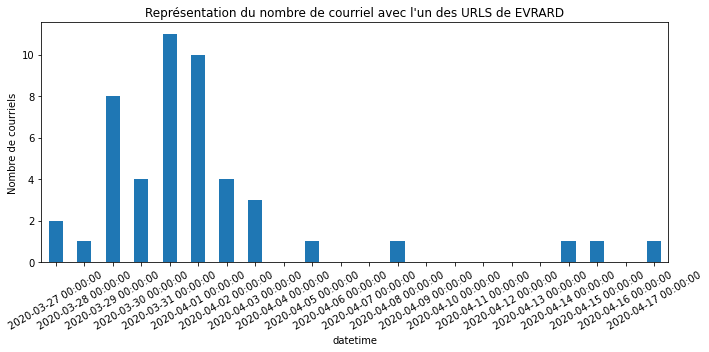

In [58]:
ax = email_df.filt('urls', with_values=['https://www.youtube.com/watch?v=izzadeWl3b0','https://www.youtube.com/watch?v=VjlDLSemGd0'], condition='or').df.set_index('datetime').resample('D').count().email_id.plot(kind='bar', figsize=(10,5), title = "Représentation du nombre de courriel avec l'un des URLS de EVRARD")
plt.xticks(rotation=30)
plt.tight_layout()
ax.set_ylabel('Nombre de courriels')
plt.savefig(output_path_graph_folder/'EVRARD.png', dpi = 300)

## RADIO-QUEBEC

In [59]:
url_radio_quebec = yt_url.df[yt_url.df.author == 'Radio-Québec']
len(url_radio_quebec)

15

In [60]:
url_radio_quebec

,Unnamed: 0,url,title,date_published,description,author,rating,views,theme
1,1,https://www.youtube.com/watch?v=DH7Ot3DrmX4,#COVID19: La FRAUDE STATISTIQUE confirmée.,2020-04-10,Les représentants des services sanitaires conf...,Radio-Québec,4.696071,540998.0,"[virus, bilan]"
9,9,https://www.youtube.com/watch?v=AEYHofyP3x4,Chloroquine: Le complexe médiatico-médical imp...,2020-03-25,Trump a réussi à déjouer les plan de l'État pr...,Radio-Québec,4.880557,201430.0,"[virus, traitement, politique, usa, qanon]"
14,14,https://www.youtube.com/watch?v=Z5kA6iBpYR4,Pandémie: la trahison des médias,2020-04-01,Les médias pris en flagrant délit de fabricati...,Radio-Québec,4.867124,157909.0,[virus]
19,19,https://www.youtube.com/watch?v=m8HF4GXjsP8,Victoire! la volte-face du gouvernement.,2020-04-24,Le Gouv. Legault CONFIRME l'analyse de radio-Q...,Radio-Québec,4.805863,243198.0,"[virus, bilan, complot, politique, regions]"
20,20,https://www.youtube.com/watch?v=012sY5eZ440,Une pandémie préméditée?,2020-04-03,J'explique les raisons pour lesquelles je pens...,Radio-Québec,4.825522,153517.0,[virus]
27,27,https://www.youtube.com/watch?v=i_-6b9LNk2A,#STOPCONFINEMENT,2020-04-15,De nombreux experts confirment les propos que ...,Radio-Québec,4.846847,152953.0,"[virus, bilan, experts]"
79,79,https://www.youtube.com/watch?v=UvOzDSaf3H8,CORONAVIRUS: Vers la fin de la pandémie?,2020-03-20,1 - CoVid-19: Trump rend disponible un médicam...,Radio-Québec,4.907645,140700.0,"[virus, traitement, bilan, politique, europe, ..."
94,94,https://www.youtube.com/watch?v=9Wso0nnLpYE,COVID-19: Le CDC avoue l'erreur.,2020-03-28,"1 - L'expert américain Anthony Fauci, du CDC, ...",Radio-Québec,4.876005,111991.0,"[virus, bilan, experts, usa]"
206,206,https://www.youtube.com/watch?v=Xsnk57CwHxE,Le Coup d'État mondial confirmé,2020-07-14,Encouragez ceux qui osent: http://www.paypal.m...,Radio-Québec,4.891285,246311.0,"[virus, masque]"
257,257,https://www.youtube.com/watch?v=TzxLZ12kbg8,Les «complotistes» ont (presque) toujours raison,2020-05-29,1- L'OMS confirme: il n'y aura pas de 2e vague...,Radio-Québec,4.909476,160605.0,"[virus, politique, regions, usa, reste_du_monde]"


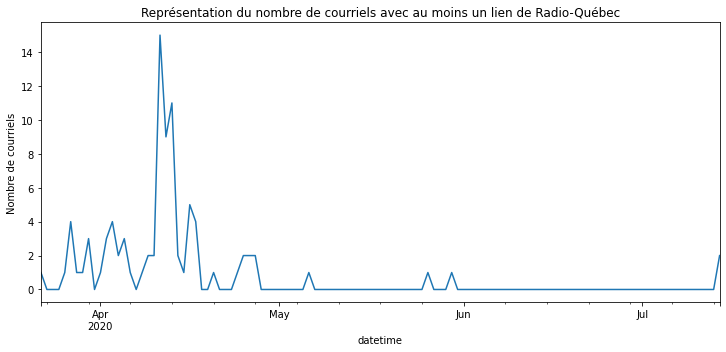

In [61]:
ax = email_df.filt('urls', with_values=url_radio_quebec['url'].values, condition='or').df.set_index('datetime').resample('D').count().email_id.plot(figsize=(10,5), title='Représentation du nombre de courriels avec au moins un lien de Radio-Québec')
plt.tight_layout()
ax.set_ylabel('Nombre de courriels')
plt.savefig(output_path_graph_folder/'RadioQ.png', dpi = 300)

## OMS

In [62]:
num_email_with_word_oms = email_df.filt('text', with_values=['oms']).df.shape[0]
num_email_with_word_oms_and_theme_complot = email_df.filt('text', with_values=['oms']).filt('theme', with_values=['complot']).df.shape[0]
email_oms = email_df.filt('text', with_values=['oms'])
email_oms_complot = email_df.filt('text', with_values=['oms']).filt('theme', with_values=['complot'])

In [63]:
print(f"Il y a {num_email_with_word_oms} courriel avec le mot 'OMS' et de ces {num_email_with_word_oms}, {num_email_with_word_oms_and_theme_complot} abordent la thématique complot")

Il y a 47 courriel avec le mot 'OMS' et de ces 47, 11 abordent la thématique complot


In [64]:
email_oms.df.theme.explode().value_counts()

virus              31
reseaux_sociaux    21
politique          20
reste_du_monde     16
regions            12
complot            11
entourage          11
traitement         10
usa                 8
chine               7
europe              7
bilan               6
laboratoire         3
experts             3
qanon               1
Name: theme, dtype: int64

In [65]:
email_oms.df.urls.explode().value_counts().drop('')

https://www.youtube.com/watch?v=s5hxuk1oNI8                                                                                     6
https://www.senscritique.com/livre/La_deprogrammation/22554062/actualites                                                       3
https://www.linkedin.com/in/janhvimbhojwani                                                                                     3
https://issues.fr/allemagne-deuxieme-vague-confinement/?fbclid=IwAR0XTR3gt4t-2udXZ3lqDa0yIJxjwOm7gSGr0LfkdO311xIba1bUndn3PB0    3
https://www.sciencedirect.com/science/article/abs/pii/S0399832004949238                                                         2
                                                                                                                               ..
https://twitter.com/covid_infos                                                                                                 1
https://fr.m.wikipedia.org/wiki/Aide:Comment_modifier_une_page                            

### COVIDINFO

In [66]:
email_df.filt('domain', with_values=['covidinfos']).df

,email_id,from,to,ip,datetime,day,month,year,weekofyear,has_attach,...,num_urls,urls,domain,subject,body,num_words,has_url,text,theme,source
19,19,jeanmarceau2004@hotmail.com,decrypteurs@radio-canada.ca,NaN,2020-05-22 00:59:02,22,5,2020,21,False,...,1,[https://covidinfos.net/covid19/suede-lepidemi...,[covidinfos],confinement,Vrai ou faux ?\r\nhttps://covidinfos.net/covid...,14,True,Vrai ou faux ? https://covidinfos.net/covid19/...,[virus],[covidinfos]
99,99,louise.savard11@gmail.com,decrypteurs@radio-canada.ca,NaN,2020-08-03 14:12:38,3,8,2020,32,False,...,1,[https://covidinfos.net/covid19/la-geneticienn...,[covidinfos],G=C3=A9n=C3=A9ticienne_Alexandra_Henrion-Claude,"Bonjour, Qu’en penser? https://covidinfos.ne...",16,True,"Bonjour, Qu’en penser? https://covidinfos.net/...",[],[covidinfos]
133,133,redaction.plumes@sympatico.ca,decrypteurs@radio-canada.ca,NaN,2020-06-07 12:19:40,7,6,2020,23,False,...,2,[https://covidinfos.net/covid19/le-prix-nobel-...,"[covidinfos, covidinfos]",Encore une nouvelle un peu douteuse,\nBonjour à vous…\n\nJe sais que vous êtes déj...,78,True,Bonjour à vous… Je sais que vous êtes déjà déb...,"[virus, experts, entourage]","[covidinfos, covidinfos]"
187,187,madamelcb@gmail.com,decrypteurs@radio-canada.ca,NaN,2020-05-22 15:16:29,22,5,2020,21,True,...,4,[https://covidinfos.net/covid19/le-prix-nobel-...,"[covidinfos, NaN, whatsapp, covidinfos]",Qu'en pensez-vous?,"*Bonjour,*\n\nMon cousin de 81 ans est bombard...",500,True,"*Bonjour,* Mon cousin de 81 ans est bombardé d...","[virus, bilan, experts, politique, usa, reste_...","[covidinfos, NaN, whatsapp, covidinfos]"
582,582,gerald.fortin555@gmail.com,decrypteurs@radio-canada.ca,NaN,2020-06-07 10:02:26,7,6,2020,23,True,...,27,"[, , https://twitter.com/covid_infos, https://...","[, , twitter, facebook, facebook, , , , , , , ...",ovid_Infos,est-ce que cet article est vrai? J’aimerais av...,393,True,est-ce que cet article est vrai? J’aimerais av...,"[politique, virus, reseaux_sociaux, chine, com...","[, , twitter, facebook, facebook, , , , , , , ..."
616,616,jdupere728@hotmail.com,decrypteurs@radio-canada.ca,NaN,2020-05-24 18:47:22,24,5,2020,21,False,...,2,[https://covidinfos.net/covid19/le-prix-nobel-...,"[covidinfos, ]",UmXDp3UgcGFyIGNvdXJyaWVsIA==,\r\n\r\nSubject: Opinion d'un prix Nobel de ch...,16,True,Subject: Opinion d'un prix Nobel de chimie !!!...,[experts],"[covidinfos, ]"
810,810,lynnchadwick2@gmail.com,decrypteurs@radio-canada.ca,NaN,2020-04-29 11:59:09,29,4,2020,18,False,...,1,[https://covidinfos.net/],[covidinfos],=C3=80_propos_de_du_dite_covidinfos=2Enet,"Bonjour,\n\nD’abord merci pour votre fabuleux ...",98,True,"Bonjour, D’abord merci pour votre fabuleux tra...","[virus, traitement, complot, europe]",[covidinfos]
925,925,Marie_Pierre_Cloutier@hotmail.fr,decrypteurs@radio-canada.ca,NaN,2020-04-30 04:17:16,30,4,2020,18,False,...,3,[https://covidinfos.net/covid19/suede-lepidemi...,"[covidinfos, hostingpics, hostingpics]",_Su=E8de=3F_,Est-ce vrai?\nhttps://covidinfos.net/covid19/s...,20,True,Est-ce vrai? https://covidinfos.net/covid19/su...,"[virus, europe]","[covidinfos, hostingpics, hostingpics]"
971,971,daniel.gagne@globetrotter.net,decrypteurs@radio-canada.ca,NaN,2020-08-08 11:05:53,8,8,2020,32,False,...,1,[https://covidinfos.net/covid19/il-faut-refuse...,[covidinfos],encore_et_toujours_=E2=80=A6.,https://covidinfos.net/covid19/il-faut-refuser...,9,True,https://covidinfos.net/covid19/il-faut-refuser...,"[virus, traitement]",[covidinfos]
4298,4298,jplupien63@hotmail.com,decrypteurs@radio-canada.ca,NaN,2020-07-06 17:40:26,6,7,2020,28,False,...,3,"[https://www.voltairenet.org/, https://covidin...","[voltairenet, covidinfos, ]",NaN,"Bonjour,\n\nQue pouvez-vous me dire sur ces 2 ...",36,True,"Bonjour, Que pouvez-vous me dire sur ces 2 sit...",[],"[voltairenet, covidinfos, ]"


### Legault et Trudeau

In [67]:
email_df.filt('text', with_values=['legault'], condition='or').df.urls.explode()

124            https://www.facebook.com/1329085907225997/
329     https://www.change.org/p/françois-legault-non-...
1055    https://secure.avaaz.org/fr/community_petition...
1402    https://opencorporates.com/companies/ca_qc/114...
1402            https://opengovca.com/corporation/3446221
1402            https://opengovca.com/corporation/3446221
1402    https://www.lapresse.ca/affaires/economie/immo...
1402    https://sothebysrealty.ca/fr/city-info/quebec/...
1403    https://opencorporates.com/companies/ca_qc/114...
1403            https://opengovca.com/corporation/3446221
1403            https://opengovca.com/corporation/3446221
1403    https://www.lapresse.ca/affaires/economie/immo...
1403    https://sothebysrealty.ca/fr/city-info/quebec/...
2531    https://quebecnouvelles.info/alexandre-taillef...
2531    https://quebecnouvelles.info/alexandre-taillef...
2725    https://www.change.org/p/fran%C3%A7ois-legault...
3232    https://www.change.org/p/monsieur-le-premier-m...
4125          

### Experts

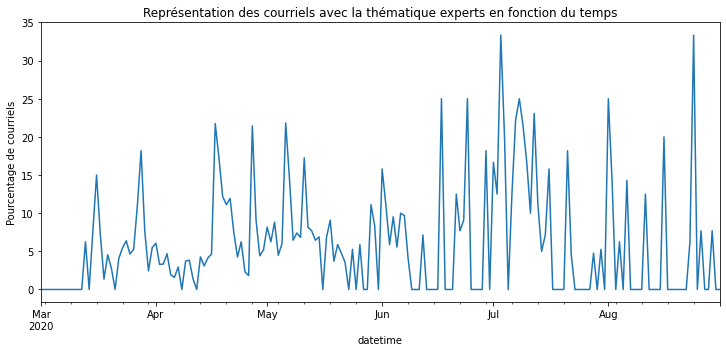

In [68]:
ax = email_df.theme_per_day(pourc=True)['experts'].plot(figsize=(10,5), title= 'Représentation des courriels avec la thématique experts en fonction du temps')
plt.tight_layout()
ax.set_ylabel("Pourcentage de courriels")
plt.savefig(output_path_graph_folder/'expert_seul.png', dpi=300)

In [69]:
# combien d'urls avec experts

In [70]:
fb_url.filt('theme', with_values=['experts']).df.shape[0]

5

In [71]:
yt_url.filt('theme', with_values=['experts']).df.shape[0]

51

In [72]:
email_df.groupby_theme(prop=False)

virus              2302
traitement          569
masque              312
bilan               419
complot             566
experts             353
reseaux_sociaux    2911
5g                  109
politique           710
regions             715
europe              440
usa                 399
chine               482
reste_du_monde      660
entourage           735
laboratoire         142
qanon                36
dtype: int64

### Pascal Borel

In [73]:
email_df.filt('urls', with_values=['https://www.youtube.com/watch?v=7t82PZcp-4A']).df.set_index('datetime').resample('D').count().email_id.loc['2020-3-26':'2020-03-28'].sum()

84

In [74]:
email_df.email_per_day.loc['2020-3-26':'2020-03-28'].sum()

326

### N95

In [75]:
df = email_df.df.set_index('datetime').loc['2020-4-1':'2020-4-15']

In [76]:
df.urls.explode()[df.domain.explode() == 'facebook'].value_counts()

https://www.facebook.com/2435648836745547/      8
https://www.facebook.com/221750599238300/       6
https://www.facebook.com/3004250292972420/      5
https://www.facebook.com/100012965373412/       4
https://www.facebook.com/565333511002518/       4
                                               ..
https://www.facebook.com/100009587691440/       1
https://www.facebook.com/100004552698780/       1
https://www.facebook.com/100020667434455/       1
https://www.facebook.com/DeuilVieResilience/    1
https://www.facebook.com/10222307419338662/     1
Name: urls, Length: 191, dtype: int64

### 5G

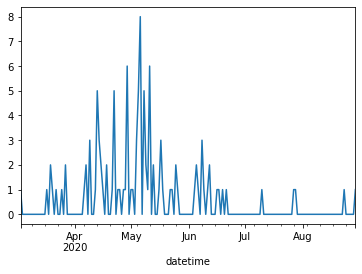

In [77]:
email_df.filt('theme', with_values=['5g']).df.set_index('datetime').resample('D').count().email_id.plot()

### QANON

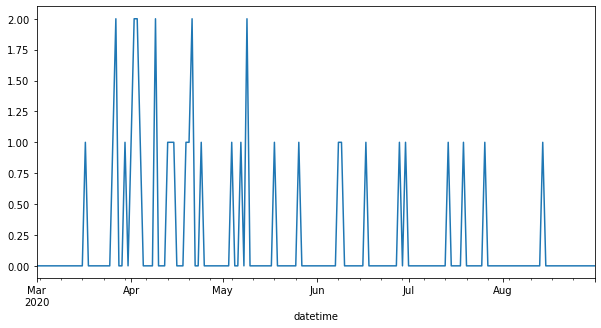

In [78]:
email_df.theme_per_day(pourc=False)['qanon'].plot(figsize=(10,5), )


In [79]:
email_df.groupby_word_in_theme()['qanon']

the storm          0
la tempête         0
wwg1wga            0
pédophilie         6
satanique          2
satanisme          0
deep state         2
état profond       1
pizzagate          2
adrenochrome       0
frazzledrip        0
comet ping pong    0
le réveil          0
great awakening    0
gitmo              0
guantanamo         0
declas             1
qanon              1
dtype: int64

In [80]:
yt_url.filt('theme', with_values=['qanon']).df

,Unnamed: 0,url,title,date_published,description,author,rating,views,theme
9,9,https://www.youtube.com/watch?v=AEYHofyP3x4,Chloroquine: Le complexe médiatico-médical imp...,2020-03-25,Trump a réussi à déjouer les plan de l'État pr...,Radio-Québec,4.880557,201430.0,"[virus, traitement, politique, usa, qanon]"
36,36,https://www.youtube.com/watch?v=OzcAcjhwJko,Le plus gros scandale médical du siècle,2020-03-26,"4,55 euros la boite de chloroquine Trump a réu...",Tony 777,4.250000,10492.0,"[virus, traitement, reseaux_sociaux, politique..."
241,241,https://www.youtube.com/watch?v=RQ3Bdi0FZeM,Lock Bill Gates Up!,2020-04-11,Millennial Millie investigates the deep confli...,Millennial Millie,4.808592,368892.0,"[virus, traitement, reseaux_sociaux, qanon]"
332,332,https://www.youtube.com/watch?v=oHp27yT83mM,Nouvelle Phase du Plan !,2020-06-01,"L'épidémie se termine, l'état profond a décidé...",Silvano Trotta,4.940517,119460.0,"[virus, traitement, bilan, reseaux_sociaux, us..."
408,408,https://www.youtube.com/watch?v=dL2A1NrIq7I,Coronavirus A perfect storm La tempête parfaite,NaN,ABONNE-TOI! https://www.instagram.com/4ovet24/...,4ovet24,4.800859,28478.0,"[reseaux_sociaux, politique, qanon]"


In [81]:
fb_url.filt('theme', with_values=['qanon']).df

,Unnamed: 0,url,title,published_date,comments,reactions,shares,views,theme
78,78,https://www.facebook.com/10220333495740251/,Leroy Jenkins - 🍿COVID 911:The DEEP STATE insu...,2020-06-28T14:19:52-07:00,10684.0,29532.0,102923.0,NaN,[qanon]


In [82]:
email_df.filt('theme', with_values=['qanon', 'entourage']).df.sort_values('datetime').to_clipboard()

In [83]:
email_df.filt('theme', with_values=['qanon']).df.urls.explode().value_counts().drop('')

https://www.youtube.com/watch?v=AEYHofyP3x4                                                                                                                                                                                                                                                                                                     8
https://www.youtube.com/watch?v=BrjphEHgXlQ                                                                                                                                                                                                                                                                                                     4
https://www.youtube.com/watch?v=mSstX80zpHk                                                                                                                                                                                                                                                                                         